In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 8.6 MB/s eta 0:00:00


Cooking Time: 6.5
Heat Level: 75.66666666666666


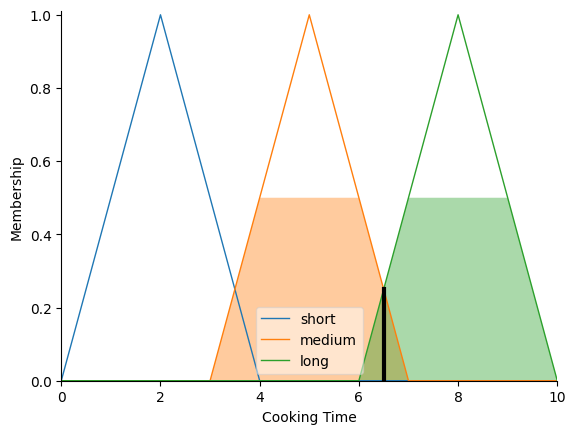

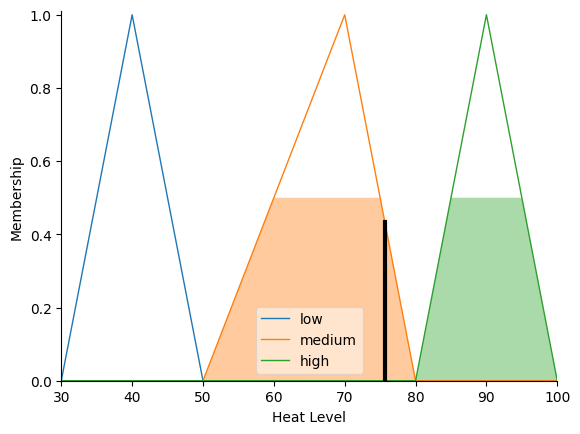

In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

FT=ctrl.Antecedent(np.arange(1,10.1,0.1),'Food Type')
FW=ctrl.Antecedent(np.arange(1,10.1,0.1),'Food Weight')
IT=ctrl.Antecedent(np.arange(0, 60.1, 10),'Initial Temperature')
WC=ctrl.Antecedent(np.arange(1,10.1,0.1),'Water Content')

CT = ctrl.Consequent(np.arange(0, 10.1, 0.1), 'Cooking Time')
HL = ctrl.Consequent(np.arange(30, 100.1, 10), 'Heat Level')

FT['soft'] = fuzz.trimf(FT.universe, [0, 2, 4])
FT['medium'] = fuzz.trimf(FT.universe, [3, 5, 7])
FT['hard'] = fuzz.trimf(FT.universe, [6, 8, 10])

FW['light'] = fuzz.trimf(FW.universe, [0, 2, 4])
FW['medium'] = fuzz.trimf(FW.universe, [3, 5, 7])
FW['heavy'] = fuzz.trimf(FW.universe, [6, 8, 10])

IT['cold'] = fuzz.trimf(IT.universe, [0 , 10 , 20])
IT['warm'] = fuzz.trimf(IT.universe, [20 , 30 , 40])
IT['hot'] = fuzz.trimf(IT.universe, [40, 50 , 60])

WC['low'] = fuzz.trimf(WC.universe, [0, 2, 4])
WC['medium'] = fuzz.trimf(WC.universe, [3, 5, 7])
WC['high'] = fuzz.trimf(WC.universe, [6, 8, 10])

CT['short'] = fuzz.trimf(CT.universe, [0, 2, 4])
CT['medium'] = fuzz.trimf(CT.universe, [3, 5, 7])
CT['long'] = fuzz.trimf(CT.universe, [6, 8, 10])

HL['low'] = fuzz.trimf(HL.universe, [30, 40 , 50])
HL['medium'] = fuzz.trimf(HL.universe, [50,70,80])
HL['high'] = fuzz.trimf(HL.universe, [80,90, 100])

rule1 = ctrl.Rule(FT['soft'] & FW['light'], CT['short'])
rule2 = ctrl.Rule(FT['medium'] & FW['light'], CT['medium'])
rule3 = ctrl.Rule(FT['hard'] & FW['light'], CT['long'])
rule4 = ctrl.Rule(FT['soft'] & FW['medium'], CT['medium'])
rule5 = ctrl.Rule(FT['medium'] & FW['medium'], CT['medium'])
rule6 = ctrl.Rule(FT['hard'] & FW['medium'], CT['long'])
rule7 = ctrl.Rule(FT['soft'] & FW['heavy'], CT['medium'])
rule8 = ctrl.Rule(FT['medium'] & FW['heavy'], CT['long'])
rule9 = ctrl.Rule(FT['hard'] & FW['heavy'], CT['long'])

rule10 = ctrl.Rule(IT['cold'] & WC['low'], CT['medium'])
rule11 = ctrl.Rule(IT['warm'] & WC['low'], CT['medium'])
rule12 = ctrl.Rule(IT['hot'] & WC['low'], CT['short'])
rule13 = ctrl.Rule(IT['cold'] & WC['medium'], CT['long'])
rule14 = ctrl.Rule(IT['warm'] & WC['medium'], CT['medium'])
rule15 = ctrl.Rule(IT['hot'] & WC['medium'], CT['medium'])
rule16 = ctrl.Rule(IT['cold'] & WC['high'], CT['long'])
rule17 = ctrl.Rule(IT['warm'] & WC['high'], CT['long'])
rule18 = ctrl.Rule(IT['hot'] & WC['high'], CT['medium'])

rule19 = ctrl.Rule(FT['soft'] & FW['light'], HL['low'])
rule20= ctrl.Rule(FT['medium'] & FW['light'], HL['medium'])
rule21 = ctrl.Rule(FT['hard'] & FW['light'], HL['medium'])
rule22 = ctrl.Rule(FT['soft'] & FW['medium'], HL['medium'])
rule23 = ctrl.Rule(FT['medium'] & FW['medium'], HL['medium'])
rule24 = ctrl.Rule(FT['hard'] & FW['medium'], HL['high'])
rule25 = ctrl.Rule(FT['soft'] & FW['heavy'], HL['medium'])
rule26 = ctrl.Rule(FT['medium'] & FW['heavy'], HL['high'])
rule27 = ctrl.Rule(FT['hard'] & FW['heavy'], HL['high'])

rule28 = ctrl.Rule(IT['cold'] & WC['low'], HL['high'])
rule29 = ctrl.Rule(IT['warm'] & WC['low'], HL['medium'])
rule30 = ctrl.Rule(IT['hot'] & WC['low'], HL['low'])
rule31 = ctrl.Rule(IT['cold'] & WC['medium'], HL['medium'])
rule32 = ctrl.Rule(IT['warm'] & WC['medium'], HL['medium'])
rule33 = ctrl.Rule(IT['hot'] & WC['medium'], HL['medium'])
rule34 = ctrl.Rule(IT['cold'] & WC['high'], HL['high'])
rule35 = ctrl.Rule(IT['warm'] & WC['high'], HL['high'])
rule36 = ctrl.Rule(IT['hot'] & WC['high'], HL['medium'])


cooking_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9,
rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18,
rule19, rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27,
rule28, rule29, rule30, rule31, rule32, rule33, rule34, rule35, rule36])
cooking = ctrl.ControlSystemSimulation(cooking_ctrl)

cooking.input['Food Type'] = 5
cooking.input['Food Weight'] = 7
cooking.input['Initial Temperature'] = 30
cooking.input['Water Content'] = 6
cooking.compute()
print(f"Cooking Time: {cooking.output['Cooking Time']}")
print(f"Heat Level: {cooking.output['Heat Level']}")
CT.view(sim=cooking)
HL.view(sim=cooking)